In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import autorootcwd
import onnxruntime

In [3]:
# Load the ONNX model
session = onnxruntime.InferenceSession("./data/onnx/conditional_large.onnx")

In [4]:
# List input names, shapes, and types
for input_meta in session.get_inputs():
    print("Name:", input_meta.name)
    print("Shape:", input_meta.shape)
    print("Type:", input_meta.type)

Name: input.1
Shape: [1, 256]
Type: tensor(int64)
Name: onnx::Gemm_1
Shape: [1, 28]
Type: tensor(float)


In [ ]:
# Run inference, using random data
import numpy as np
import torch
import torch.nn.functional as F

# Create random input data
batch_size = 1
seq_len = 256
vocab_size = 50257


In [ ]:
from src.utils import get_filenames, get_raw_chord_annotation

In [7]:
filenames = get_filenames()
len(filenames)

1213

In [9]:
durs = []
for filename in filenames:
    raw_chord_annotation = get_raw_chord_annotation(filename)
    duration = raw_chord_annotation[-1].time + raw_chord_annotation[-1].duration
    durs.append(duration)

In [14]:
from src.utils import id_to_chord

In [16]:
id_to_chord(2)

'C:maj'

In [11]:
import numpy as np
durs = np.array(durs)
durs.mean(), durs.std()

(217.93221548225063, 71.02444523720789)

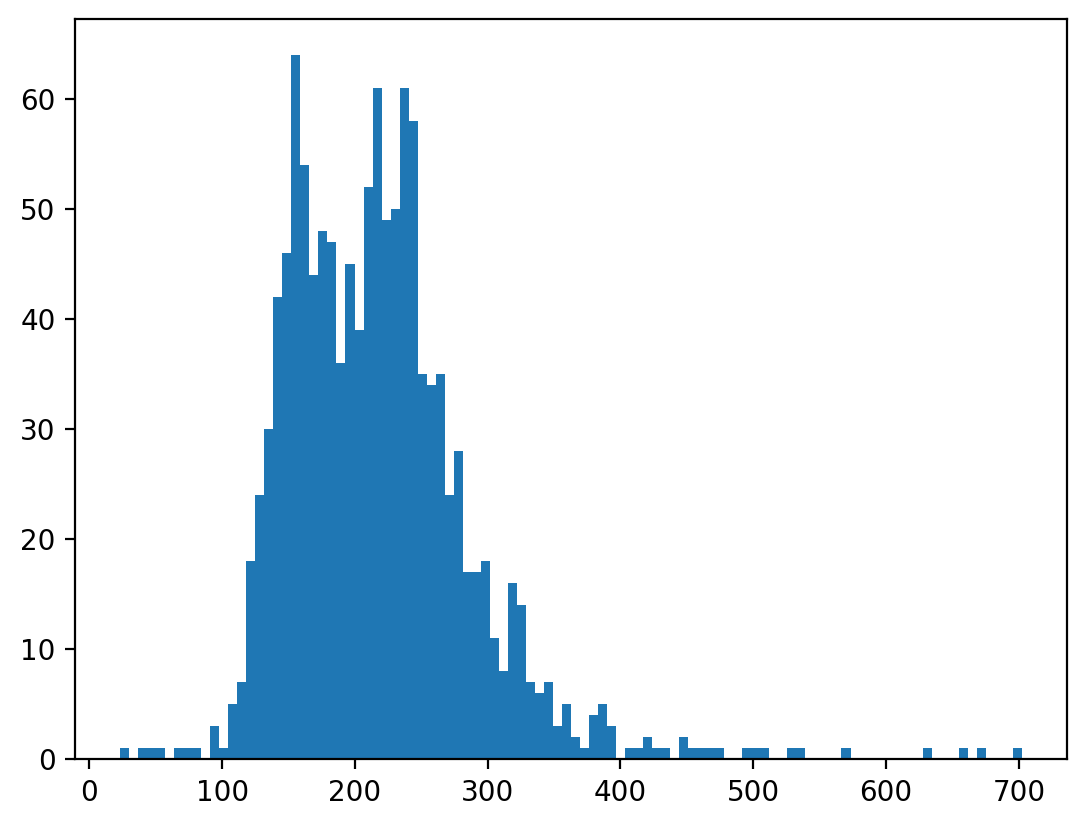

In [13]:
import matplotlib.pyplot as plt

plt.hist(durs, bins=100)
plt.show()

In [20]:
(durs.sum() / 60) / 60 # hours of audio

73.43104927221388